In [1]:
from taker import Model
import torch
import matplotlib.pyplot as plt
m = Model()

- Loaded nickypro/tinyllama-15m
 - Registered 6 Attention Layers


In [3]:
m["embed"].weight.shape

torch.Size([32000, 288])

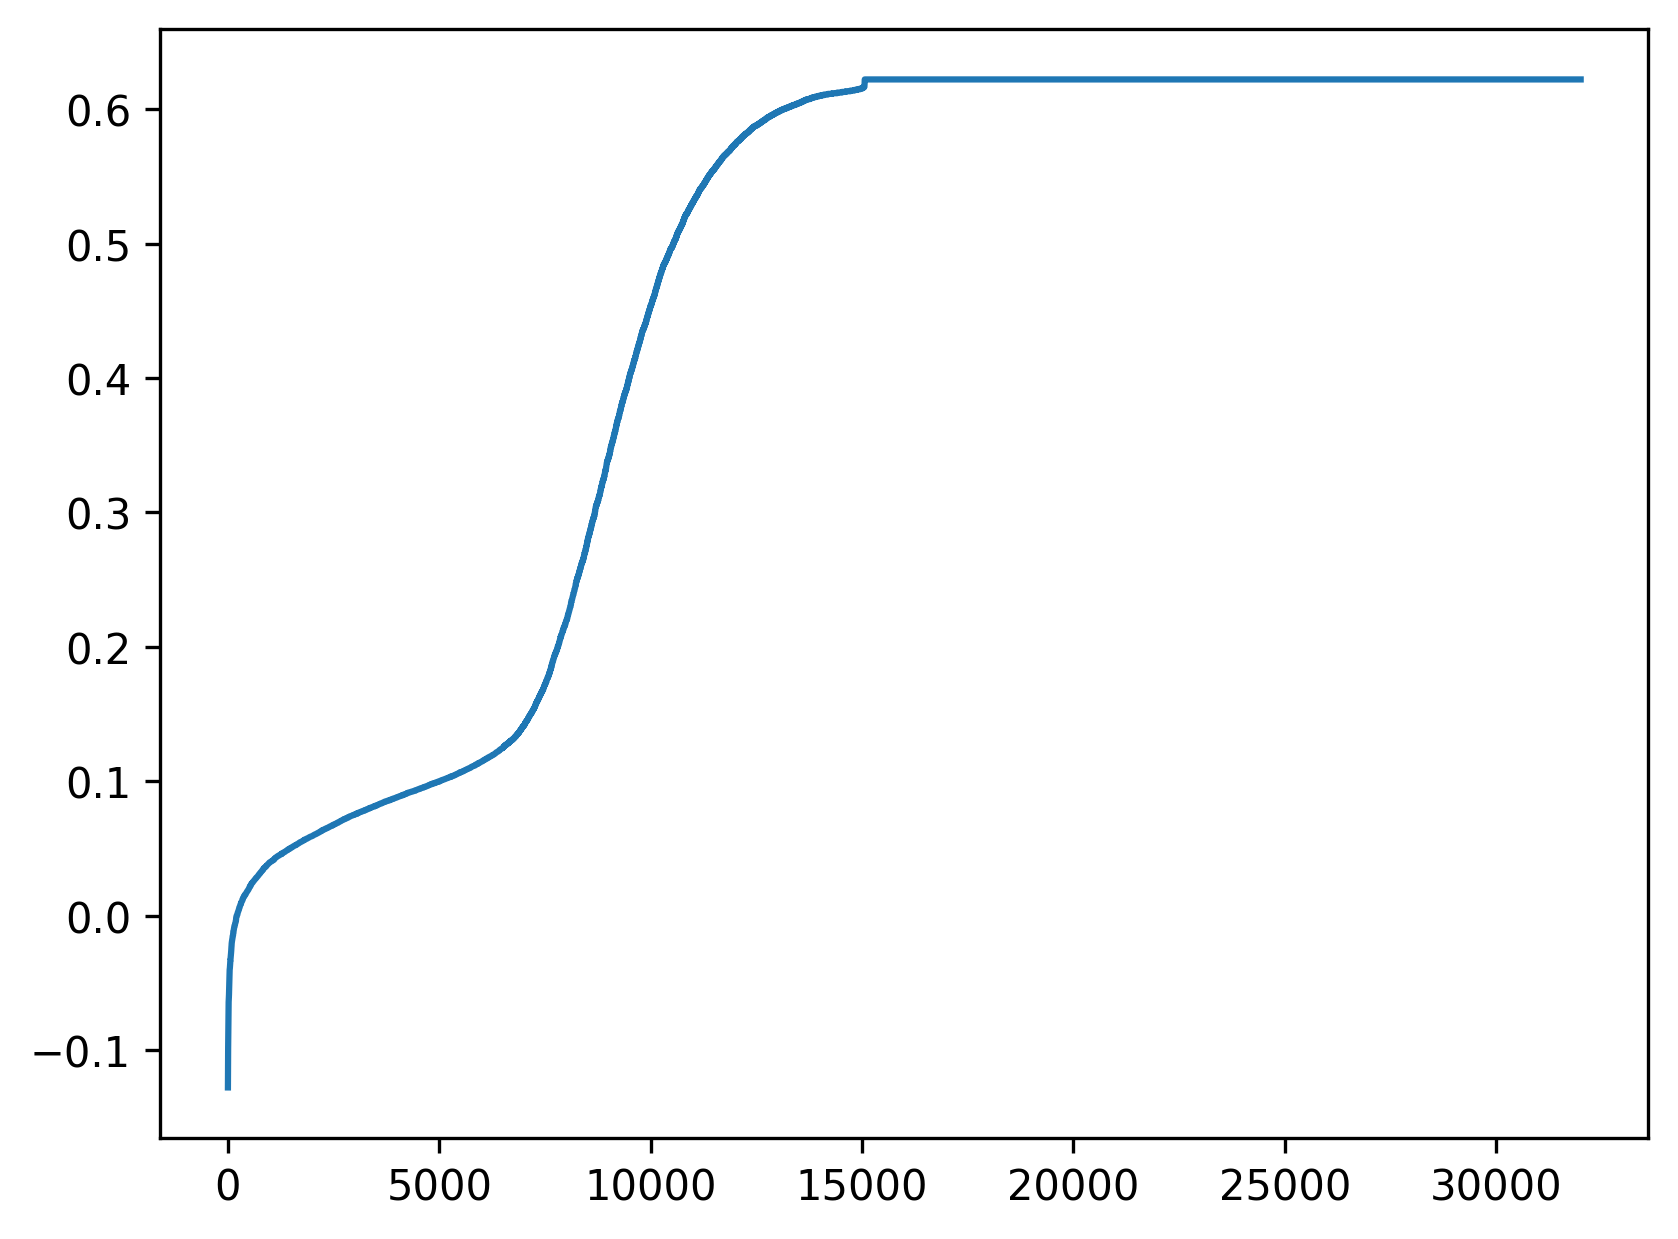

In [16]:
plt.plot( sorted((m["embed"].weight @ m["embed"].weight[100].unsqueeze(-1) ).detach().cpu().flatten() ) )

In [24]:
w = torch.randn(30000, 288)
w = (1 / torch.norm(w, dim=1)) * w

print(w.norm(dim=0).shape, w.norm(dim=1).shape)

plt.plot( sorted(( w @ w[100].unsqueeze(-1) ).detach().cpu().flatten() ) )

RuntimeError: The size of tensor a (30000) must match the size of tensor b (288) at non-singleton dimension 1

In [ ]:
text = """
NeurIPS
My Stuff
Search



Dates
Submit
Attend
Organizers


NeurIPS 2024, the Thirty-eighth Annual Conference on Neural Information Processing Systems, will be held at the Vancouver Convention Center

Monday Dec 9 through Sunday Dec 15. Monday is an industry expo.


Registration
Registration details will be posted soon.

Our Hotel Reservation page is currently under construction and will be released shortly. NeurIPS has contracted Hotel guest rooms for the Conference at group pricing, requiring reservations only through this page. Please do not make room reservations through any other channel, as it only impedes us from putting on the best Conference for you. We thank you for your assistance in helping us protect the NeurIPS conference.

Announcements


Latest NeurIPS Blog Entries [ All Entries ]
Mar 03, 2024	NeurIPS 2024 Call for Competitions
Dec 11, 2023	Announcing the NeurIPS 2023 Paper Awards
Dec 10, 2023	Announcing NeurIPS 2023 Invited Talks
Dec 09, 2023	Reflections on the NeurIPS 2023 Ethics Review Process
Nov 23, 2023	NeurIPS Newsletter – November 2023
Nov 20, 2023	NeurIPS Newsletter – October 2023
Nov 06, 2023	Introducing the NeurIPS 2023 Tutorials
Oct 17, 2023	NeurIPS Newsletter – September 2023
Oct 13, 2023	Introducing the College Outreach Program at NeurIPS 2023
Sep 12, 2023	Your NeurIPS Workshop was Accepted – Now What?
Important Dates
Sponsor Portal Applications open	Mar 15 '24 01:46 PM CDT *
Competition Proposal Submission Deadline	Mar 27 '24 (Anywhere on Earth)	01 weeks 05 days 23:58:45
Competition Proposal Submission Notification	Apr 17 '24 08:00 PM CDT *
Main Conference Submission Site Opens	Apr 22 '24 08:00 PM CDT *
AbstractSubmissionDeadline	May 15 '24 03:00 PM CDT *	08 weeks 05 days 07:58:46
Main Conference Paper Submission Deadline	May 22 '24 03:00 PM CDT *	09 weeks 05 days 07:58:46
Main Conference Full Paper Submission Deadline	May 22 '24 03:00 PM CDT *	09 weeks 05 days 07:58:46
Main Conference Author Notification	Sep 25 '24 08:00 PM CDT *
Camera-ready, poster, and video submission	Oct 30 '24 (Anywhere on Earth)	32 weeks 05 days 23:58:45
Last Chance for Registration Refund	Nov 16 '24 01:00 AM CST *
All dates
Timezone: Europe/Prague

Exhibitors
If you have questions about supporting the conference, please contact us.

(not currently taking applications)

Organizing Committee
Workflow Manager
Zhenyu (Sherry) Xue (NeurIPS Foundation)
Logistics and IT
Brad Brockmeyer (NeurIPS Foundation)
Brian Nettleton (EventHosts)
Lee Campbell (NeurIPS / Eventhosts)
Max A Wiesner (NeurIPS Foundation)
Stephanie Willes (NeurIPS Conference Staff)
Teresa M Auricchio (ICML NeurIPS AIStats)
Mission Statement
The Neural Information Processing Systems Foundation is a non-profit corporation whose purpose is to foster the exchange of research advances in Artificial Intelligence and Machine Learning, principally by hosting an annual interdisciplinary academic conference with the highest ethical standards for a diverse and inclusive community.



About the Conference
The conference was founded in 1987 and is now a multi-track interdisciplinary annual meeting that includes invited talks, demonstrations, symposia, and oral and poster presentations of refereed papers. Along with the conference is a professional exposition focusing on machine learning in practice, a series of tutorials, and topical workshops that provide a less formal setting for the exchange of ideas.

More about the Neural Information Processing Systems foundation »

NeurIPS uses cookies to remember that you are logged in. By using our websites, you agree to the placement of cookies. Our Privacy Policy »

NeurIPS logo
The NeurIPS Logo above may be used on presentations. Right-click and choose download. It is a vector graphic and may be used at any scale.

USEFUL LINKS
Press
Exhibitor Information
CONTACT
1269 Law St, San Diego CA 92109

Email

NeurIPS Proceedings"""

/home/ubuntu/taker/src/taker/model.py:147: UserWarning: Model nickypro/tinyllama-15m-rand not tested.
  warnings.warn( f"Model {model_repo} not tested." )


- Loaded nickypro/tinyllama-15m-rand
 - Registered 6 Attention Layers


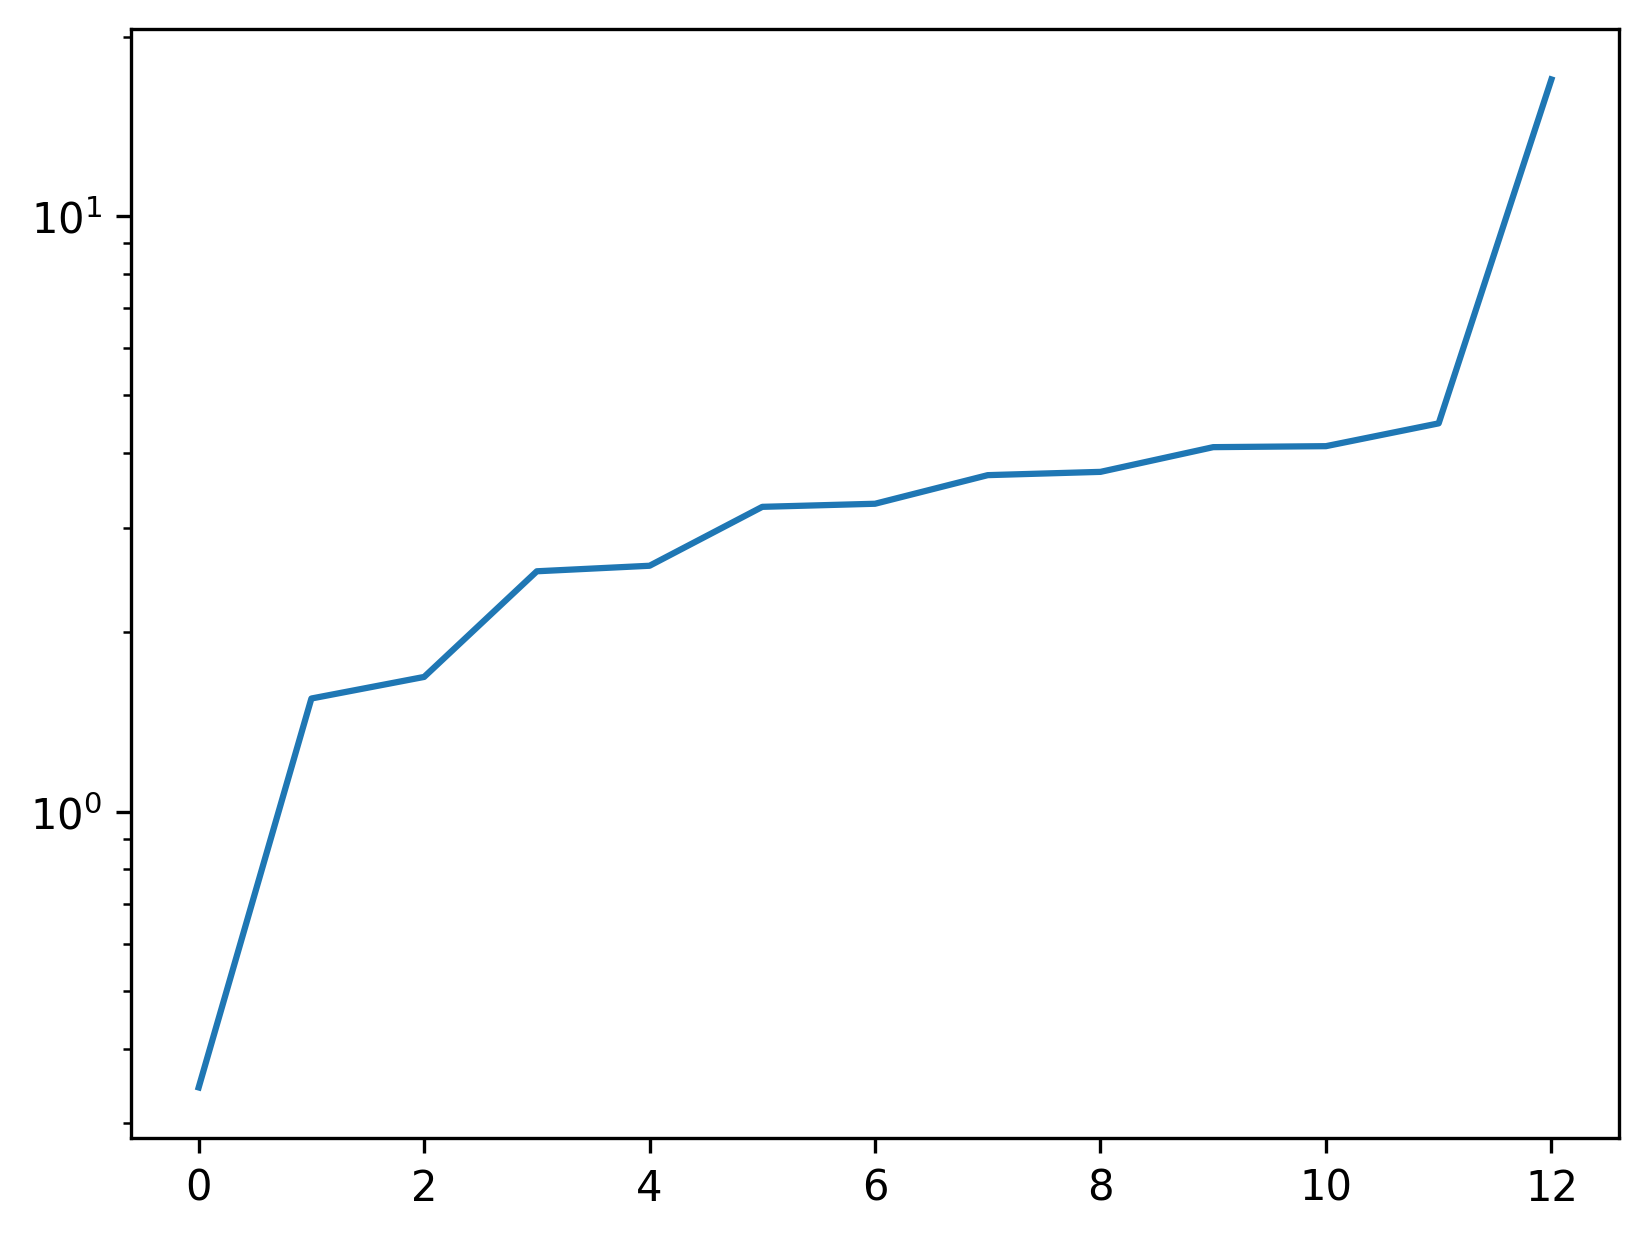

In [33]:
m = Model("nickypro/tinyllama-15m-rand")
res_rand = m.get_residual_stream("something sus")
res_rand.shape
res_rand.norm(dim=-1)
plt.semilogy(res_rand.norm(dim=-1).mean(dim=1).detach().cpu())

/home/ubuntu/taker/src/taker/model.py:147: UserWarning: Model nickypro/tinyllama-15M not tested.
  warnings.warn( f"Model {model_repo} not tested." )


- Loaded nickypro/tinyllama-15M
 - Registered 6 Attention Layers


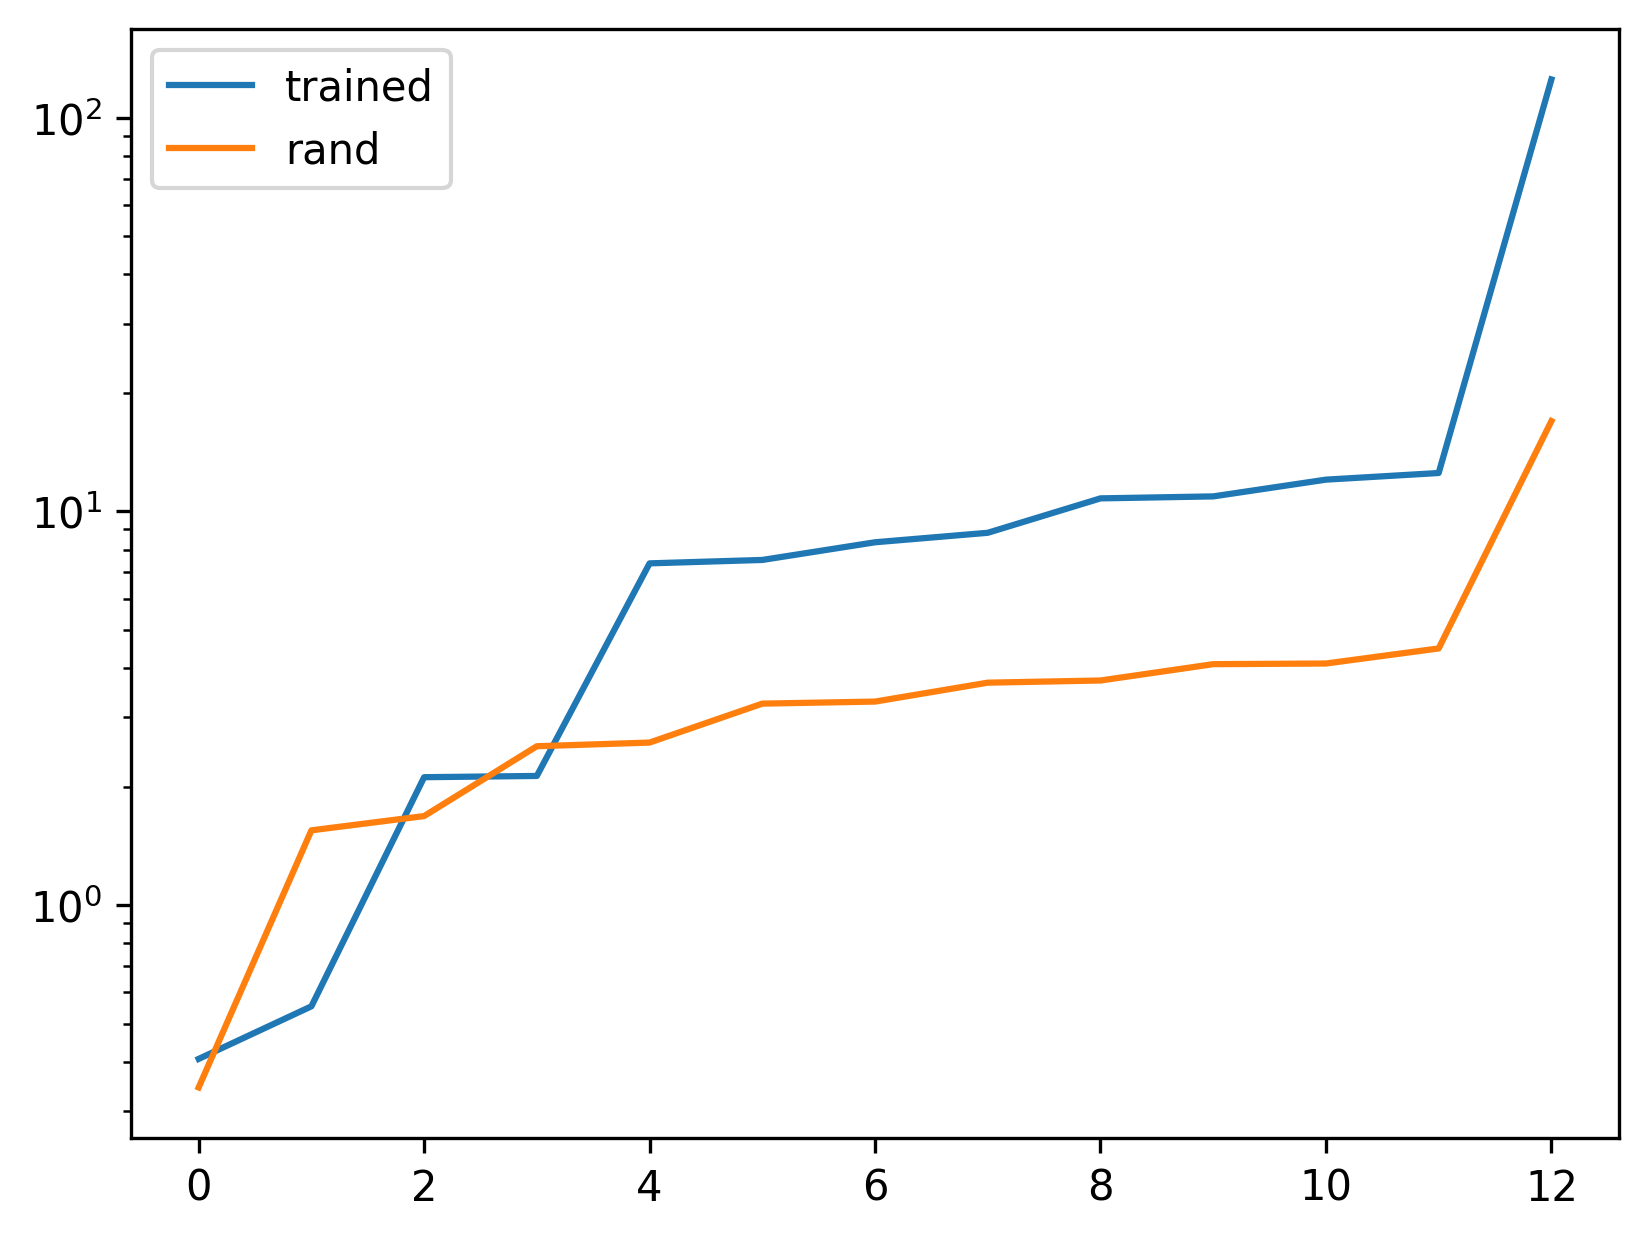

In [37]:

m = Model("nickypro/tinyllama-15M")
res = m.get_residual_stream("something sus")
res.shape
res.norm(dim=-1)
plt.figure()
plt.title("residual stream layer norm")
plt.semilogy(res.norm(dim=-1).mean(dim=1).detach().cpu(), label="trained")
plt.semilogy(res_rand.norm(dim=-1).mean(dim=1).detach().cpu(), label="rand")
plt.legend()
plt.show()